In [1]:
import anndata
import itertools
import networkx as nx
import pandas as pd
import scanpy as sc
import scglue
import seaborn as sns
from matplotlib import rcParams

In [2]:
scglue.plot.set_publication_params()
rcParams["figure.figsize"] = (4, 4)

In [3]:
rna = anndata.read_h5ad("/home/micl/workspace/lmh_data/sclab/rna_preprocessed.h5ad")
hic = anndata.read_h5ad("/home/micl/workspace/lmh_data/sclab/hic_preprocessed.h5ad")
graph = nx.read_graphml("/home/micl/workspace/lmh_data/sclab/prior.graphml.gz")

In [4]:
scglue.models.configure_dataset(
    rna, "NB", use_highly_variable=True,
    use_layer="counts", use_rep="X_pca"
)

In [5]:
scglue.models.configure_dataset(
    hic, "NB", use_highly_variable=True,
    use_rep="X_pca"
)

In [6]:
graph = graph.subgraph(itertools.chain(
    rna.var.query("highly_variable").index,
    hic.var.query("highly_variable").index
))

In [7]:
glue = scglue.models.fit_SCGLUE(
    {"rna": rna, "hic": hic}, graph,
    fit_kws={"directory": "glue"}
)

[INFO] fit_SCGLUE: Pretraining SCGLUE model...
[INFO] autodevice: Using GPU 1 as computation device.
[INFO] SCGLUEModel: Setting `graph_batch_size` = 275813
[INFO] SCGLUEModel: Setting `max_epochs` = 137
[INFO] SCGLUEModel: Setting `patience` = 12
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 6
[INFO] SCGLUETrainer: Using training directory: "glue/pretrain"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.422, 'g_kl': 0.0, 'g_elbo': 0.422, 'x_rna_nll': 0.625, 'x_rna_kl': 0.018, 'x_rna_elbo': 0.642, 'x_hic_nll': 2.783, 'x_hic_kl': 0.002, 'x_hic_elbo': 2.785, 'dsc_loss': 0.65, 'vae_loss': 3.444, 'gen_loss': 3.412}, val={'g_nll': 0.421, 'g_kl': 0.0, 'g_elbo': 0.421, 'x_rna_nll': 0.618, 'x_rna_kl': 0.017, 'x_rna_elbo': 0.635, 'x_hic_nll': 2.786, 'x_hic_kl': 0.001, 'x_hic_elbo': 2.788, 'dsc_loss': 0.619, 'vae_loss': 3.44, 'gen_loss': 3.409}, 44.3s elapsed
[INFO] SCGLUETrainer: [Epoch 20] train={'g_nll': 0.412, 'g_kl': 0.0, 'g_elbo': 0.412, 'x_rna_nll': 0.616, 'x_rna_kl': 0.019, 'x_rn

2022-06-20 06:13:29,187 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "36"...
[INFO] fit_SCGLUE: Estimating balancing weight...
[INFO] estimate_balancing_weight: Clustering cells...


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


[INFO] estimate_balancing_weight: Matching clusters...
[INFO] estimate_balancing_weight: Matching array shape = (40, 12)...
[INFO] estimate_balancing_weight: Estimating balancing weight...
[INFO] fit_SCGLUE: Fine-tuning SCGLUE model...
[INFO] SCGLUEModel: Setting `graph_batch_size` = 275813
[INFO] SCGLUEModel: Setting `align_burnin` = 23
[INFO] SCGLUEModel: Setting `max_epochs` = 137
[INFO] SCGLUEModel: Setting `patience` = 12
[INFO] SCGLUEModel: Setting `reduce_lr_patience` = 6
[INFO] SCGLUETrainer: Using training directory: "glue/fine-tune"
[INFO] SCGLUETrainer: [Epoch 10] train={'g_nll': 0.405, 'g_kl': 0.0, 'g_elbo': 0.405, 'x_rna_nll': 0.615, 'x_rna_kl': 0.019, 'x_rna_elbo': 0.634, 'x_hic_nll': 2.771, 'x_hic_kl': 0.002, 'x_hic_elbo': 2.772, 'dsc_loss': 0.651, 'vae_loss': 3.423, 'gen_loss': 3.39}, val={'g_nll': 0.406, 'g_kl': 0.0, 'g_elbo': 0.406, 'x_rna_nll': 0.61, 'x_rna_kl': 0.019, 'x_rna_elbo': 0.629, 'x_hic_nll': 2.789, 'x_hic_kl': 0.002, 'x_hic_elbo': 2.791, 'dsc_loss': 0.63, 

2022-06-20 07:08:13,961 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


[INFO] EarlyStopping: Restoring checkpoint "60"...


In [8]:
glue.save("/home/micl/workspace/lmh_data/sclab/glue.dill")

In [9]:
dx = scglue.models.integration_consistency(
    glue, {"rna": rna, "hic": hic}, graph,
    count_layers={"rna": "counts"}
)
dx

[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:194: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(


[INFO] metacell_corr: Computing correlation on 10 common metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:194: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:572: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:194: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(


[INFO] metacell_corr: Computing correlation on 20 common metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:194: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:572: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:194: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(


[INFO] metacell_corr: Computing correlation on 48 common metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:194: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:572: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:194: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(


[INFO] metacell_corr: Computing correlation on 92 common metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:194: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:572: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


[INFO] get_metacells: Clustering metacells...
[INFO] get_metacells: Aggregating metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:194: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(
/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:194: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return AnnData(


[INFO] metacell_corr: Computing correlation on 165 common metacells...


/home/liminghong/miniconda3/envs/sclab/lib/python3.8/site-packages/scglue/data.py:572: RuntimeWarning: invalid value encountered in double_scalars
  ((X[s] * X[t]).mean() - mean[s] * mean[t]) / (std[s] * std[t])


,n_meta,consistency
0,10,0.002477
1,20,-0.004383
2,50,-0.002725
3,100,-0.000738
4,200,0.000615


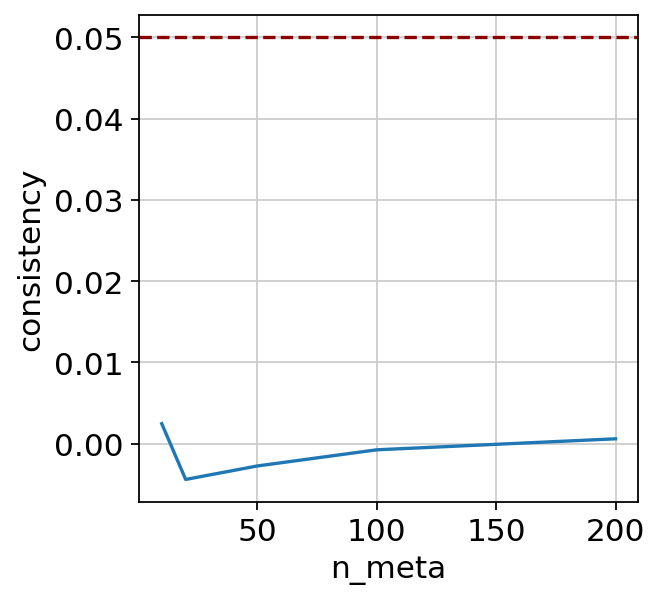

In [10]:
_ = sns.lineplot(x="n_meta", y="consistency", data=dx).axhline(y=0.05, c="darkred", ls="--")

In [11]:
rna.obsm["X_glue"] = glue.encode_data("rna", rna)
hic.obsm["X_glue"] = glue.encode_data("hic", hic)

combined = anndata.concat([rna, hic])

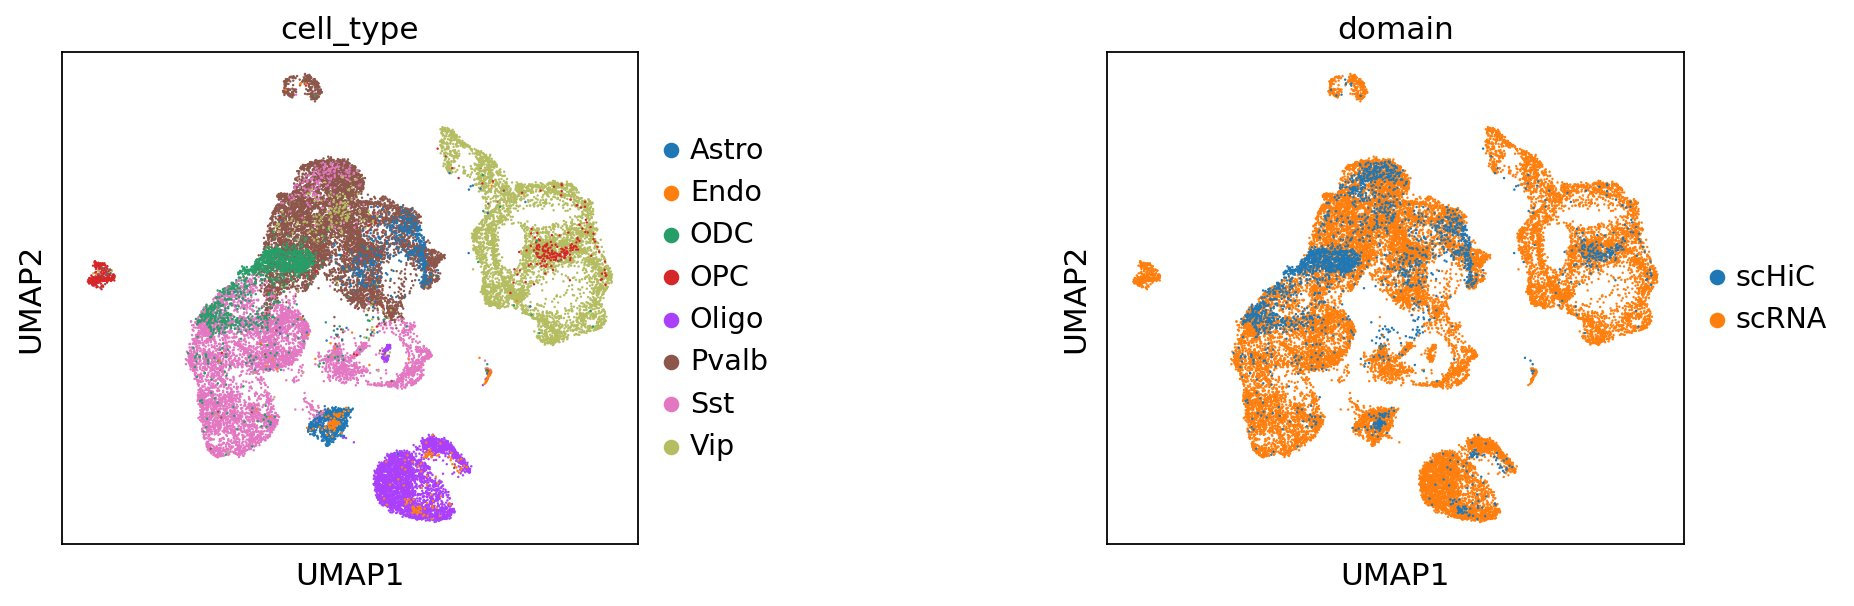

In [12]:
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined)
sc.pl.umap(combined, color=["cell_type", "domain"], wspace=0.65)